## K-Mean Clustring

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
#import utils
import pandas as pd
import numpy as np
from itertools import cycle, islice
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

%matplotlib inline

In [2]:
!ls

Cluster Analysis.ipynb


In [3]:
data = pd.read_csv('../Datasets/minute_weather.csv', sep=',')
print(data.shape)
data.head()

(1587257, 13)


,rowID,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
0,0,2011-09-10 00:00:49,912.3,64.76,97.0,1.2,106.0,1.6,85.0,1.0,NaN,NaN,60.5
1,1,2011-09-10 00:01:49,912.3,63.86,161.0,0.8,215.0,1.5,43.0,0.2,0.0,0.0,39.9
2,2,2011-09-10 00:02:49,912.3,64.22,77.0,0.7,143.0,1.2,324.0,0.3,0.0,0.0,43.0
3,3,2011-09-10 00:03:49,912.3,64.40,89.0,1.2,112.0,1.6,12.0,0.7,0.0,0.0,49.5
4,4,2011-09-10 00:04:49,912.3,64.40,185.0,0.4,260.0,1.0,100.0,0.1,0.0,0.0,58.8


In [4]:
data[data.isnull().any(axis=1)].shape

(434, 13)

In [5]:
cleaned_data = data.dropna()
print(cleaned_data.shape)

cleaned_data.head()

(1586823, 13)


,rowID,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
1,1,2011-09-10 00:01:49,912.3,63.86,161.0,0.8,215.0,1.5,43.0,0.2,0.0,0.0,39.9
2,2,2011-09-10 00:02:49,912.3,64.22,77.0,0.7,143.0,1.2,324.0,0.3,0.0,0.0,43.0
3,3,2011-09-10 00:03:49,912.3,64.40,89.0,1.2,112.0,1.6,12.0,0.7,0.0,0.0,49.5
4,4,2011-09-10 00:04:49,912.3,64.40,185.0,0.4,260.0,1.0,100.0,0.1,0.0,0.0,58.8
5,5,2011-09-10 00:05:49,912.3,63.50,76.0,2.5,92.0,3.0,61.0,2.0,0.0,0.0,62.6


In [6]:
cleaned_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
rowID,1586823.0,793614.029185,458204.542564,1.00,396794.5,793643.00,1190380.50,1587256.00
air_pressure,1586823.0,916.830248,3.051509,905.00,914.8,916.70,918.70,929.50
air_temp,1586823.0,61.855267,11.832718,31.64,52.7,62.24,70.88,99.50
avg_wind_direction,1586823.0,161.965420,95.208136,0.00,62.0,182.00,217.00,359.00
avg_wind_speed,1586823.0,2.774273,2.060758,0.00,1.3,2.20,3.80,32.30
max_wind_direction,1586823.0,163.403084,92.367252,0.00,68.0,187.00,223.00,359.00
max_wind_speed,1586823.0,3.399815,2.423168,0.10,1.6,2.70,4.60,36.00
min_wind_direction,1586823.0,166.826422,97.462755,0.00,77.0,180.00,212.00,359.00
min_wind_speed,1586823.0,2.133131,1.745345,0.00,0.8,1.60,3.00,32.00
rain_accumulation,1586823.0,0.001855,0.961103,0.00,0.0,0.00,0.00,655.01


In [7]:
cleaned_data[cleaned_data['rain_accumulation'] == 0].shape

(1577452, 13)

In [8]:
cleaned_data[cleaned_data['rain_duration'] == 0].shape

(1571710, 13)

In [9]:
#del cleaned_data['rain_duration']
del cleaned_data['rain_accumulation']
cleaned_data.head()

,rowID,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_duration,relative_humidity
1,1,2011-09-10 00:01:49,912.3,63.86,161.0,0.8,215.0,1.5,43.0,0.2,0.0,39.9
2,2,2011-09-10 00:02:49,912.3,64.22,77.0,0.7,143.0,1.2,324.0,0.3,0.0,43.0
3,3,2011-09-10 00:03:49,912.3,64.40,89.0,1.2,112.0,1.6,12.0,0.7,0.0,49.5
4,4,2011-09-10 00:04:49,912.3,64.40,185.0,0.4,260.0,1.0,100.0,0.1,0.0,58.8
5,5,2011-09-10 00:05:49,912.3,63.50,76.0,2.5,92.0,3.0,61.0,2.0,0.0,62.6


In [10]:
cleaned_data.columns

Index(['rowID', 'hpwren_timestamp', 'air_pressure', 'air_temp',
       'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction',
       'max_wind_speed', 'min_wind_direction', 'min_wind_speed',
       'rain_duration', 'relative_humidity'],
      dtype='object')

In [11]:
features = ['air_pressure', 'air_temp', 'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction',
       'max_wind_speed', 'relative_humidity']

In [12]:
selected_data = cleaned_data[features]
selected_data.head()

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,relative_humidity
1,912.3,63.86,161.0,0.8,215.0,1.5,39.9
2,912.3,64.22,77.0,0.7,143.0,1.2,43.0
3,912.3,64.40,89.0,1.2,112.0,1.6,49.5
4,912.3,64.40,185.0,0.4,260.0,1.0,58.8
5,912.3,63.50,76.0,2.5,92.0,3.0,62.6


## Scaling Value

In [13]:
x = StandardScaler().fit_transform(selected_data)
print(type(x))
print(x)
x.shape == selected_data.shape

<class 'numpy.ndarray'>
[[-1.4845933   0.16942291 -0.01014011 ...  0.55860634 -0.78402129
  -0.29367037]
 [-1.4845933   0.19984704 -0.89241793 ... -0.22089095 -0.90782621
  -0.1753875 ]
 [-1.4845933   0.2150591  -0.76637824 ... -0.55650784 -0.74275299
   0.07262495]
 ...
 [-0.30484867  1.0821467  -1.54362298 ... -1.31435243 -0.45387484
  -0.04947349]
 [-0.30484867  1.0821467  -1.61714614 ... -1.50922675 -0.49514314
  -0.05328907]
 [-0.30484867  1.0821467  -1.57513291 ... -1.54170581 -0.49514314
  -0.04947349]]


True

In [14]:
x[0]

array([-1.4845933 ,  0.16942291, -0.01014011, -0.95803273,  0.55860634,
       -0.78402129, -0.29367037])

### K-Mean Clustring Algorithm

In [15]:
kmeans = KMeans(n_clusters=12)
model = kmeans.fit(x)


In [16]:
print(type(kmeans), "\n", type(model))
print("Model : ", model)

<class 'sklearn.cluster.k_means_.KMeans'> 
 <class 'sklearn.cluster.k_means_.KMeans'>
Model :  KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=12, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)


In [17]:
centers = model.cluster_centers_
print(centers.shape)
centers

(12, 7)


array([[ 0.25769642, -0.99345282,  0.66219249, -0.54123111,  0.851744  ,
        -0.52455036,  1.15970201],
       [-0.85418182, -1.19921526,  0.38137269,  0.34884648,  0.47385141,
         0.33736909,  1.36602479],
       [-0.67684497,  0.57008432,  0.18260782, -0.59278416,  0.35172286,
        -0.60517544, -0.13736707],
       [ 1.18983523, -0.25232861, -1.15615468,  2.11033593, -1.0553619 ,
         2.23163806, -1.1344344 ],
       [-1.17369463, -0.86648728,  0.4484648 ,  1.97948022,  0.5388255 ,
         1.93853518,  0.90725385],
       [ 0.75468079,  0.40957983,  0.29652371, -0.51960498,  0.48222785,
        -0.52617987, -0.76958241],
       [-0.16315653,  0.86090109, -1.30985265, -0.5871544 , -1.1670488 ,
        -0.60253769, -0.63902739],
       [ 1.36505531, -0.08356992, -1.20574349, -0.06230884, -1.07461911,
        -0.04215198, -0.97389041],
       [ 0.24159454,  0.32129026,  1.88877027, -0.65164647, -1.55075023,
        -0.57517208, -0.30105439],
       [ 0.12217199,  0.8562

## Plots

In [19]:
# Function that creates a DataFrame with a column for Cluster Number

def pd_centers(featuresUsed, centers):
	colNames = list(featuresUsed)
	colNames.append('prediction')

	# Zip with a column called 'prediction' (index)
	Z = [np.append(A, index) for index, A in enumerate(centers)]

	# Convert to pandas data frame for plotting
	P = pd.DataFrame(Z, columns=colNames)
	P['prediction'] = P['prediction'].astype(int)
	return P

In [20]:
# Function that creates Parallel Plots

def parallel_plot(data):
	my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(data)))
	plt.figure(figsize=(15,8)).gca().axes.set_ylim([-3,+3])
	parallel_coordinates(data, 'prediction', color = my_colors, marker='o')

In [21]:
P = pd_centers(features, centers)
P

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,relative_humidity,prediction
0,0.257696,-0.993453,0.662192,-0.541231,0.851744,-0.524550,1.159702,0
1,-0.854182,-1.199215,0.381373,0.348846,0.473851,0.337369,1.366025,1
2,-0.676845,0.570084,0.182608,-0.592784,0.351723,-0.605175,-0.137367,2
3,1.189835,-0.252329,-1.156155,2.110336,-1.055362,2.231638,-1.134434,3
4,-1.173695,-0.866487,0.448465,1.979480,0.538826,1.938535,0.907254,4
5,0.754681,0.409580,0.296524,-0.519605,0.482228,-0.526180,-0.769582,5
6,-0.163157,0.860901,-1.309853,-0.587154,-1.167049,-0.602538,-0.639027,6
7,1.365055,-0.083570,-1.205743,-0.062309,-1.074619,-0.042152,-0.973890,7
8,0.241595,0.321290,1.888770,-0.651646,-1.550750,-0.575172,-0.301054,8
9,0.122172,0.856266,1.412484,-0.633003,1.675640,-0.584848,-0.715198,9


## Dry Days

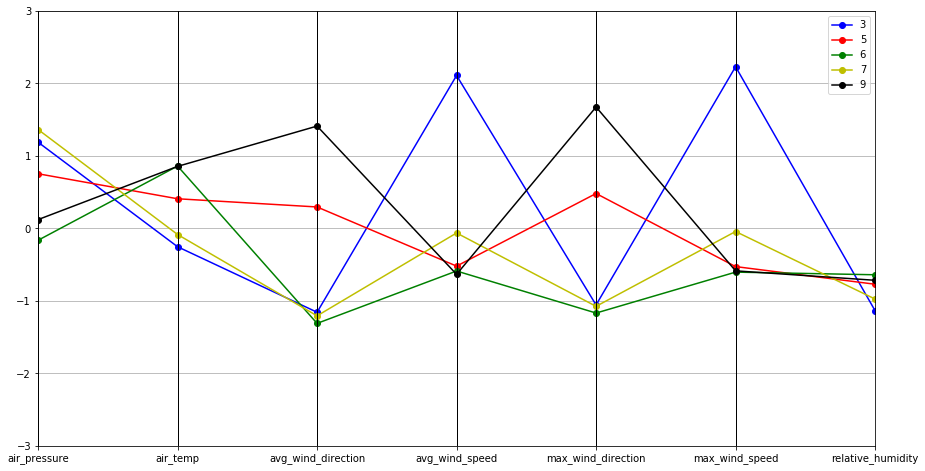

In [25]:
parallel_plot(P[P['relative_humidity'] < -0.5])

## Warm Days

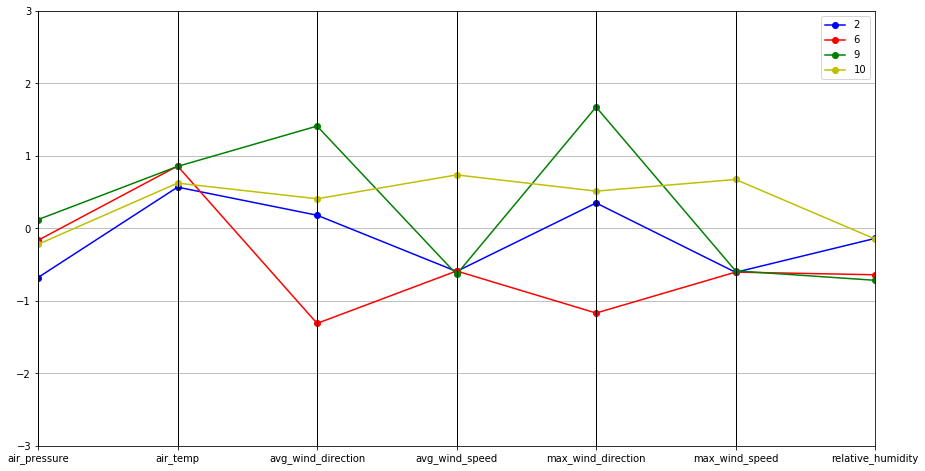

In [26]:
parallel_plot(P[P['air_temp'] > 0.5])

## Cool Days

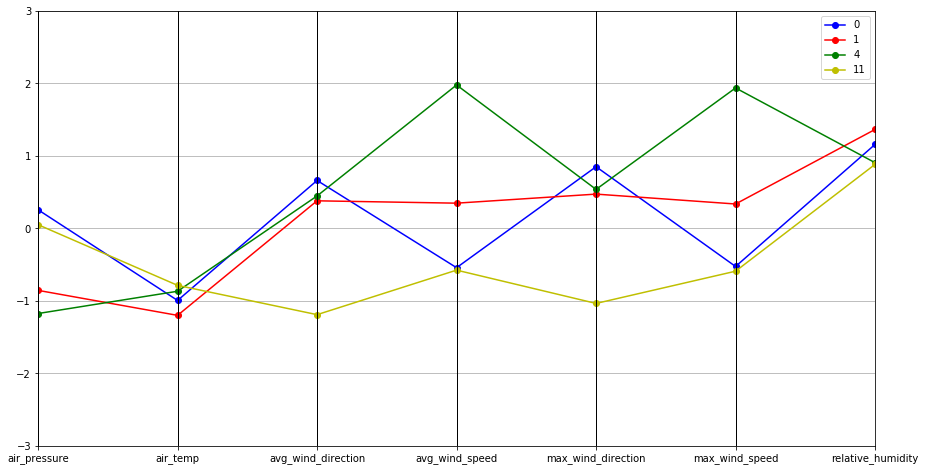

In [27]:
parallel_plot(P[(P['relative_humidity'] > 0.5) & (P['air_temp'] < 0.5)])